# Regression - Bike Shop Data

Predict how many bike rentals happen for a day (cnt). Please use the following data and respond to the questions below.

This project requires Python 3.7 or above: and Scikit Learn

In [331]:
import sys
assert sys.version_info >= (3, 7)
import sklearn
assert sklearn.__version__ >= "1.0.1"
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [332]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# EDA

In [333]:
# Read data set
df = pd.read_csv("https://raw.githubusercontent.com/Ph1lippK/VAWI/master/Data/02_Bike%20rental.csv",sep=',')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


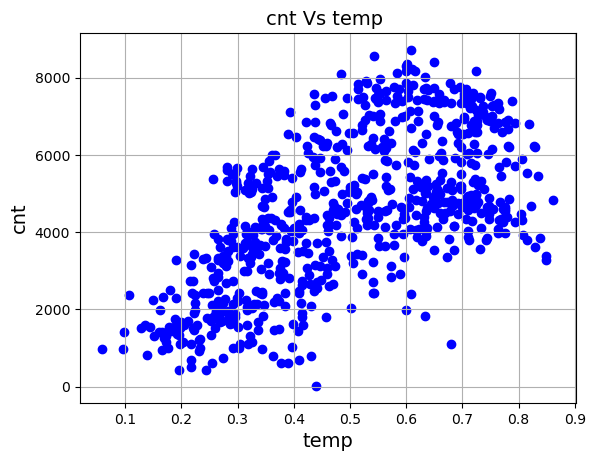

In [334]:
plt.scatter(df['temp'], df['cnt'], color='blue')
plt.title('cnt Vs temp ', fontsize=14)
plt.xlabel('temp', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

Dependent variable y is cnt as the count of total rental bikes including both casual and registered (AV)

As for now every other value will be treated as the indipendent variable X


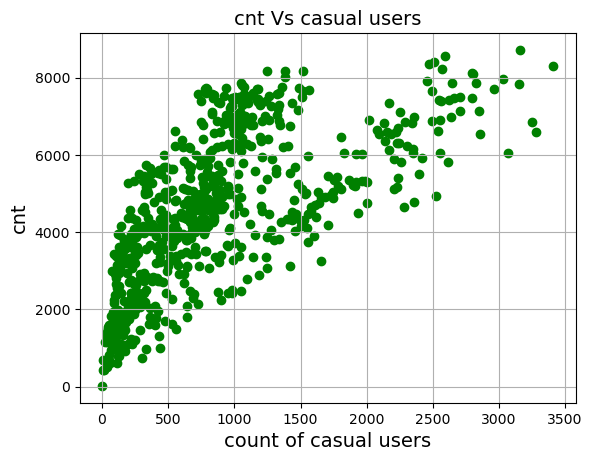

In [335]:
plt.scatter(df['casual'], df['cnt'], color='green')
plt.title('cnt Vs casual users', fontsize=14)
plt.xlabel('count of casual users', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

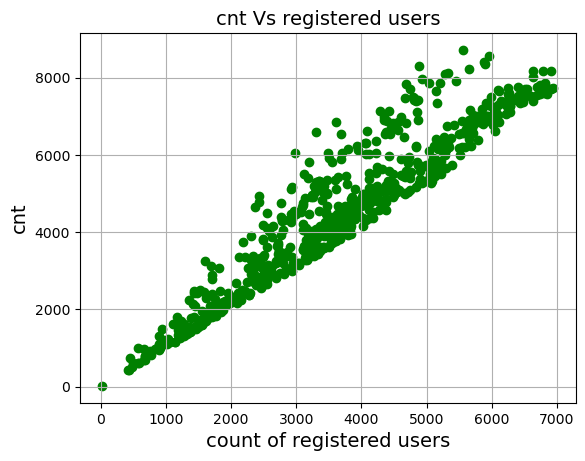

In [336]:
plt.scatter(df['registered'], df['cnt'], color='green')
plt.title('cnt Vs registered users', fontsize=14)
plt.xlabel('count of registered users', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

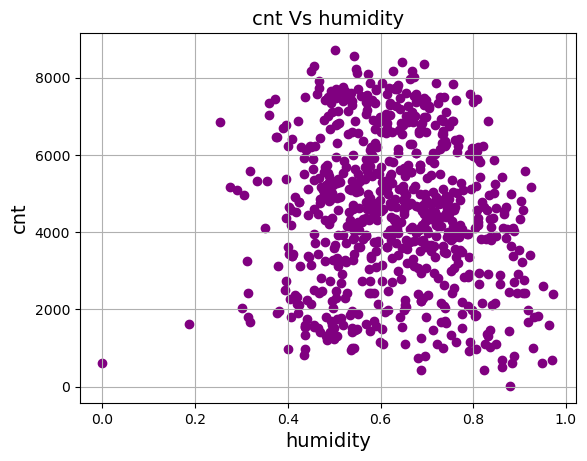

In [394]:
plt.scatter(df['hum'], df['cnt'], color='purple')
plt.title('cnt Vs humidity', fontsize=14)
plt.xlabel('humidity', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

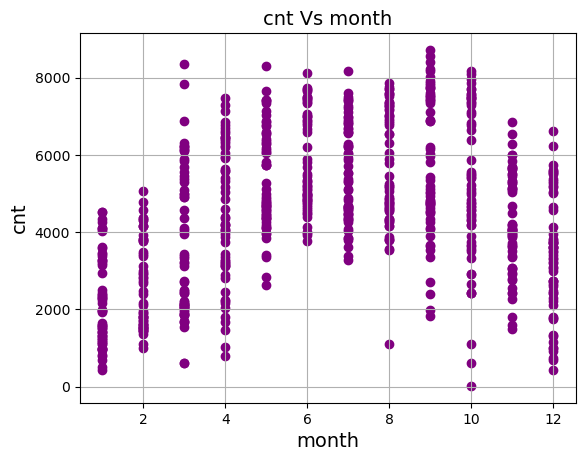

In [395]:
plt.scatter(df['mnth'], df['cnt'], color='purple')
plt.title('cnt Vs month', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

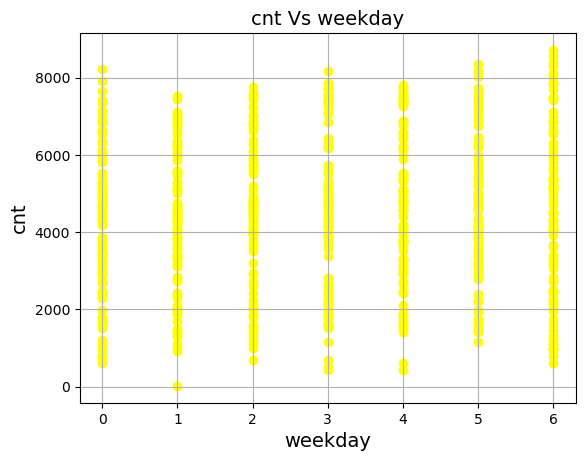

In [397]:
plt.scatter(df['weekday'], df['cnt'], color='yellow')
plt.title('cnt Vs weekday', fontsize=14)
plt.xlabel('weekday', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

# Multiple Linear Regression with sklearn 

In [364]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [427]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [429]:
#X = df[['temp','casual','registered']]#.array.reshape(-1, 1)

#X = df['temp'] #.array.reshape(-1, 1)
#X = pd.DataFrame(df.iloc[:,2:-1]) # drop frist and last row with cnt value
X = df.drop(columns=['instant','dteday','season','yr','holiday','weekday','workingday','casual','registered','atemp','cnt','weathersit'])
#y = df['cnt']
y = pd.DataFrame(df.iloc[:,-1])

In [430]:
X

,mnth,temp,hum,windspeed
0,1,0.344167,0.805833,0.160446
1,1,0.363478,0.696087,0.248539
2,1,0.196364,0.437273,0.248309
3,1,0.200000,0.590435,0.160296
4,1,0.226957,0.436957,0.186900
...,...,...,...,...
726,12,0.254167,0.652917,0.350133
727,12,0.253333,0.590000,0.155471
728,12,0.253333,0.752917,0.124383
729,12,0.255833,0.483333,0.350754


In [431]:
X.describe()

,mnth,temp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,6.519836,0.495385,0.627894,0.190486
std,3.451913,0.183051,0.142429,0.077498
min,1.000000,0.059130,0.000000,0.022392
25%,4.000000,0.337083,0.520000,0.134950
50%,7.000000,0.498333,0.626667,0.180975
75%,10.000000,0.655417,0.730209,0.233214
max,12.000000,0.861667,0.972500,0.507463


In [432]:
y

,cnt
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


# Split datasets


In [433]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train ML Model

In [434]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
 
# Create linear regression model
lin_reg = LinearRegression()
 
# Fit the linear regression model
lin_reg.fit(X_train, y_train)

LinearRegression()

# Evaluate ML Model

In [435]:
predictions_train = lin_reg.predict(X_train)
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,predictions_train))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_train, predictions_train))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train, predictions_train)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_train, predictions_train))

Mean Absolute Error(MAE): 1148.7264390329667
Mean Squared Error(MSE): 1911872.1035163586
Root Mean Squared Error(RMSE): 1382.7046335050586
R2-Square: 0.47844305438520607


In [410]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

ValueError: shapes (2, 2) and (8, 1) not aligned

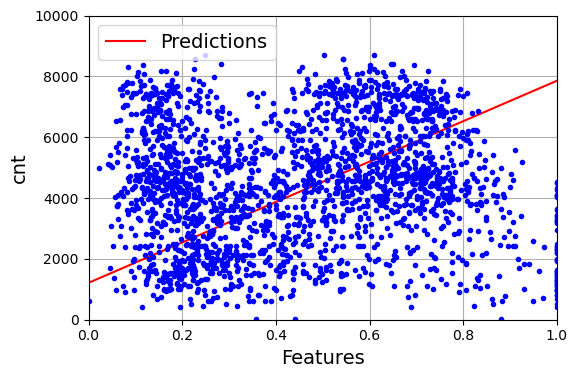

In [436]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("Features")
plt.ylabel("cnt")
#plt.axis([0, 2, 0, 15]) [xmin, xmax, ymin, ymax]'
plt.axis([0,1,0,10000])
plt.grid()
plt.legend(loc="upper left")
save_fig("Multiple_regression_bike_rentals")

plt.show()

# Multiple Linear Regression with statsmodel 

## Select & Prepare Data

In [450]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [451]:
#X = df[['temp','casual','registered']]#.array.reshape(-1, 1)

#X = df['temp'] #.array.reshape(-1, 1)
#X = pd.DataFrame(df.iloc[:,2:-1]) # drop frist and last row with cnt value
X = df.drop(columns=['instant','dteday','season','yr','holiday','weekday','workingday','casual','registered','atemp','cnt','weathersit'])
#y = df['cnt']
y = pd.DataFrame(df.iloc[:,-1])

In [452]:
X

,mnth,temp,hum,windspeed
0,1,0.344167,0.805833,0.160446
1,1,0.363478,0.696087,0.248539
2,1,0.196364,0.437273,0.248309
3,1,0.200000,0.590435,0.160296
4,1,0.226957,0.436957,0.186900
...,...,...,...,...
726,12,0.254167,0.652917,0.350133
727,12,0.253333,0.590000,0.155471
728,12,0.253333,0.752917,0.124383
729,12,0.255833,0.483333,0.350754


In [453]:
y

,cnt
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


## Split Dataset

In [454]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Train ML Model

In [456]:
# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 


In [458]:
predictions

0       985.0
1       801.0
2      1349.0
3      1562.0
4      1600.0
        ...  
726    2114.0
727    3095.0
728    1341.0
729    1796.0
730    2729.0
Length: 731, dtype: float64

## Evaluate ML Model

In [459]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.118e+32
Date:                Sun, 29 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:18:21   Log-Likelihood:                 18770.
No. Observations:                 731   AIC:                        -3.753e+04
Df Residuals:                     727   BIC:                        -3.751e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.245e-12   1.96e-13     11.435      0.0